In [1]:
%matplotlib inline

D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"



# Neural Networks for classification


In [2]:

from ai4water.hyperopt import Categorical
from ai4water.datasets import MtropicsLaos
from ai4water.experiments import DLClassificationExperiments
from ai4water.utils.utils import get_version_info


D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:

for lib, ver in get_version_info().items():
    print(lib, ver)

python 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.06
lightgbm 3.3.1
tcn 3.4.0
catboost 0.26
xgboost 1.5.0
easy_mpl 0.21.3
SeqMetrics 1.3.3
tensorflow 2.7.0
keras.api._v2.keras 2.7.0
numpy 1.21.0
pandas 1.3.4
matplotlib 3.4.3
h5py 3.5.0
sklearn 1.0.1
shapefile 2.3.0
fiona 1.8.22
xarray 0.20.1
netCDF4 1.5.7
optuna 2.10.1
skopt 0.9.0
hyperopt 0.2.7
plotly 5.3.1
lime NotDefined
seaborn 0.11.2


In [4]:
dataset = MtropicsLaos(save_as_nc=True,  # if set to True, then netcdf must be installed
                       convert_to_csv=False,
                       path="F:\\data\\MtropicsLaos",
                      )




    Not downloading the data since the directory 
    F:\data\MtropicsLaos already exists.
    Use overwrite=True to remove previously saved files and download again


In [5]:
lookback = 20
data =    dataset.make_classification(lookback_steps=lookback)

print(data.shape)

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


(4071, 9)


In [6]:
print(data.isna().sum())

air_temp           0
rel_hum            0
wind_speed         0
sol_rad            0
water_level        0
pcp                0
susp_pm            0
Ecoli_source       0
Ecoli_mpn100    3813
dtype: int64


In [7]:
inputs = data.columns.tolist()[0:-1]
inputs


['air_temp',
 'rel_hum',
 'wind_speed',
 'sol_rad',
 'water_level',
 'pcp',
 'susp_pm',
 'Ecoli_source']

In [8]:
outputs = data.columns.tolist()[-1:]
outputs

['Ecoli_mpn100']

In [9]:
print(data.head())

                      air_temp    rel_hum  wind_speed  sol_rad  water_level  \
2011-05-25 14:42:00  22.537861  96.169425         4.9    187.4        133.0   
2011-05-25 14:48:00  22.537998  96.169655         4.6    177.6        133.0   
2011-05-25 14:54:00  22.538134  96.169885         4.3    167.8        133.0   
2011-05-25 15:00:00  22.538271  96.170115         4.0    158.0        133.0   
2011-05-25 15:06:00  22.538407  96.170345         3.7    150.0        133.0   

                     pcp  susp_pm  Ecoli_source  Ecoli_mpn100  
2011-05-25 14:42:00  0.0      0.9  2.868160e+15           NaN  
2011-05-25 14:48:00  0.0      0.9  2.868160e+15           NaN  
2011-05-25 14:54:00  0.0      0.9  2.868160e+15           NaN  
2011-05-25 15:00:00  0.0      0.9  2.868160e+15           NaN  
2011-05-25 15:06:00  0.0      0.9  2.868160e+15           NaN  


In [10]:
exp = DLClassificationExperiments(
    input_features=inputs,
    output_features=outputs,
    batch_size=16,
    epochs=500,
    ts_args={"lookback": lookback},
    save=False
)



In [11]:
exp.fit(data=data,
        include=["MLP", "CNN", "LSTM", "TFT"])



********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (144, 20, 8)
target shape:  (144, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (36, 20, 8)
target shape:  (36, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (78, 20, 8)
target shape:  (78, 1)
running  MLP model



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.
invalid value encountered in true_divide
invalid value encountered in true_divide


running  CNN model



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.
invalid value encountered in true_divide
invalid value encountered in true_divide


running  LSTM model



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.
invalid value encountered in true_divide
invalid value encountered in true_divide


running  TFT model



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.



********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (144, 20, 8)
target shape:  (144, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (36, 20, 8)
target shape:  (36, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (78, 20, 8)
target shape:  (78, 1)



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.
invalid value encountered in true_divide
invalid value encountered in true_divide


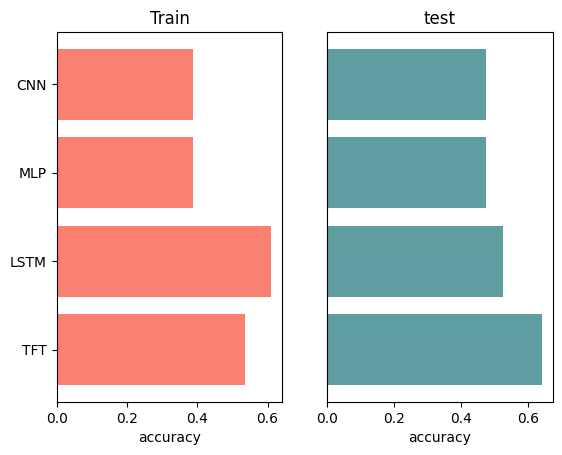

In [17]:
results = exp.compare_errors('accuracy', data=data, colors=['salmon', 'cadetblue'])

In [18]:
print(results)

         train      test
TFT   0.534722  0.641026
LSTM  0.611111  0.525641
MLP   0.388889  0.474359
CNN   0.388889  0.474359



********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (144, 20, 8)
target shape:  (144, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (36, 20, 8)
target shape:  (36, 1)

********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (78, 20, 8)
target shape:  (78, 1)


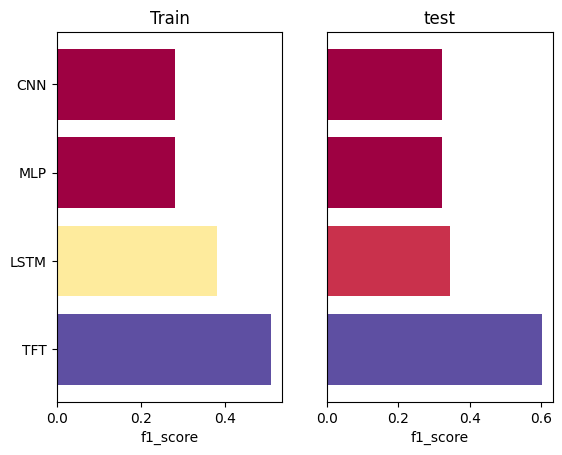

In [25]:
f1_score = exp.compare_errors('f1_score', data=data, cmaps=["Spectral", "Spectral"])

In [15]:
print(f1_score)

         train      test
TFT   0.508933  0.603486
LSTM  0.379310  0.344538
MLP   0.280000  0.321739
CNN   0.280000  0.321739


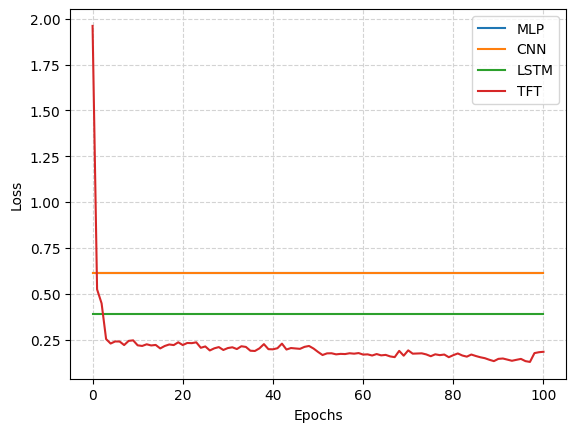

In [16]:
_ = exp.loss_comparison()